# Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [1]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [2]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

## Load Data

In [3]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path)
to_data.columns =['year', 'neighbourhood', 'single_detached_house', 'apartment_five_storeys_plus', 'movable_dwelling', 'semi_detached_house','row_house','duplex','apartment_five_storeys_less','other_house','average_house_value','shelter_costs_owned','shelter_costs_rented']
to_data.head()

year                 neighbourhood  single_detached_house  \
0  2001               Agincourt North                   3715   
1  2001  Agincourt South-Malvern West                   3250   
2  2001                     Alderwood                   3175   
3  2001                         Annex                   1060   
4  2001             Banbury-Don Mills                   3615   

   apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
0                         1480                 0                 1055   
1                         1835                 0                  545   
2                          315                 0                  470   
3                         6090                 5                 1980   
4                         4465                 0                  240   

   row_house  duplex  apartment_five_storeys_less  other_house  \
0       1295     195                          185            5   
1        455     105                          425            0   
2         50     185                          370            0   
3        605     275                         3710          165   
4        380      15                         1360            0   

   average_house_value  shelter_costs_owned  shelter_costs_rented  
0               200388                  810                   870  
1               203047                  806                   892  
2               259998                  817                   924  
3               453850                 1027                  1378  
4               371864                 1007                  1163

- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [4]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)
dwelling_units = to_data.groupby(["year"]).sum()
dwelling_units.drop(dwelling_units.iloc[:,8:11], axis =1, inplace = True)
dwelling_units.head()

single_detached_house  apartment_five_storeys_plus  movable_dwelling  \
year                                                                         
2001                 300930                       355015                75   
2006                 266860                       379400               165   
2011                 274940                       429220               100   
2016                 269680                       493270                95   

      semi_detached_house  row_house  duplex  apartment_five_storeys_less  \
year                                                                        
2001                90995      52355   23785                       116900   
2006                69430      54690   44095                       162850   
2011                72480      60355   44750                       163895   
2016                71200      61565   48585                       165575   

      other_house  
year               
2001         3040  
2006         1335  
2011         2165  
2016         2845

In [5]:
# Save the dataframe as a csv file
dwelling_units.to_csv('Grouped Toronto Dwelling by Year.csv')

In [6]:
# Helper create_bar_chart function
def create_bar_chart(data, title, xlabel, ylabel, color):
    """
    Create a barplot based in the data argument.
    """
    dwelling_type = plt.figure()
    barchart = data.plot.bar(color=color)
    barchart.set_xlabel(xlabel)
    barchart.set_ylabel(ylabel)
    barchart.set_title(title)
    plt.show()
    plt.close(dwelling_type)

In [7]:
# Create a bar chart per year to show the number of dwelling types
# Bar chart for 2001
create_bar_chart(dwelling_units.loc[2001], "Dwelling Types in Toronto in 2001", "2001", "Dwelling Type Units","blue")

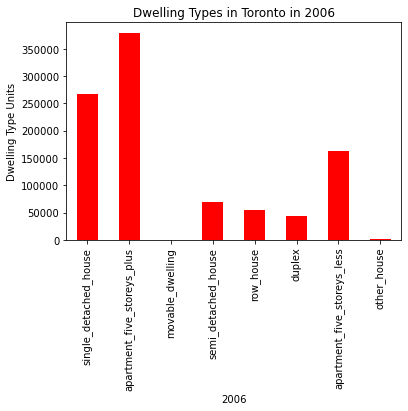

In [8]:
# Bar chart for 2006
create_bar_chart(dwelling_units.loc[2006], "Dwelling Types in Toronto in 2006", "2006", "Dwelling Type Units","red")

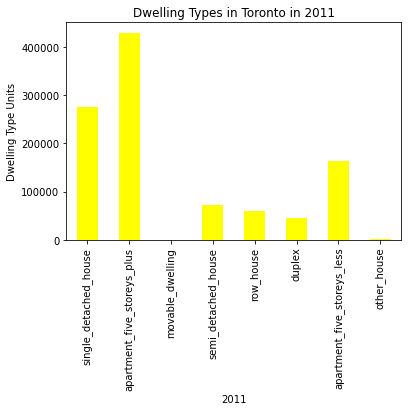

In [9]:
# Bar chart for 2011
create_bar_chart(dwelling_units.loc[2011], "Dwelling Types in Toronto in 2011", "2011", "Dwelling Type Units","yellow")

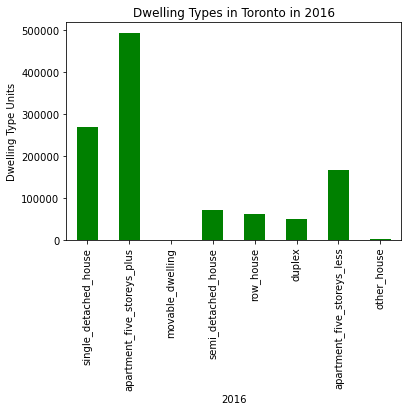

In [10]:
# Bar chart for 2016
create_bar_chart(dwelling_units.loc[2016], "Dwelling Types in Toronto in 2016", "2016", "Dwelling Type Units","Green")

- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [11]:
# Calculate the average monthly shelter costs for owned and rented dwellings
avg_shelter_cost = to_data.drop(to_data.columns[1:10], axis =1)
avg_shelter_cost2 = avg_shelter_cost.drop(avg_shelter_cost.columns[1], axis =1)
avg_shelter_cost_df = avg_shelter_cost2.groupby('year').mean()
avg_shelter_cost_df.head()

shelter_costs_owned  shelter_costs_rented
year                                           
2001           846.878571           1085.935714
2006          1316.800000            925.414286
2011          1448.214286           1019.792857
2016          1761.314286           1256.321429

In [12]:
# Helper create_line_chart function
def create_line_chart(data, color):
    data = data.plot(
        kind='line', 
        rot=90,
        title=f"Average Monthly Shelter Cost for shelter costs owned in Toronto", 
        xlabel="Year",
        ylabel="Dwelling Type Units",
        color=color
    );
    return data


<AxesSubplot:title={'center':'Average Monthly Shelter Cost for shelter costs owned in Toronto'}, xlabel='Year', ylabel='Dwelling Type Units'>

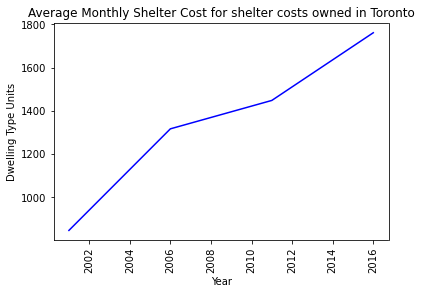

In [13]:
# Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year

# Line chart for owned dwellings
create_line_chart(avg_shelter_cost_df['shelter_costs_owned'], 'b')

In [14]:
# Line chart for rented dwellings
create_line_chart(avg_shelter_cost_df['shelter_costs_rented'], 'r')

<AxesSubplot:title={'center':'Average Monthly Shelter Cost for shelter costs owned in Toronto'}, xlabel='Year', ylabel='Dwelling Type Units'>

## Average House Value per Year

In this section, you want to determine the average house value per year. An investor may want to understand better the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property. You will visualize the `average_house_value` per year as a bar chart.

In [15]:
# Calculate the average house value per year
average_house_value = (
    to_data[['year','average_house_value']]
    .groupby(['year'])
    .mean()
)
average_house_value.head()

average_house_value
year                     
2001        289882.885714
2006        424059.664286
2011        530424.721429
2016        664068.328571

<AxesSubplot:title={'center':'Avg. House Value in Toronto'}, xlabel='Year', ylabel='Avg. House Value'>

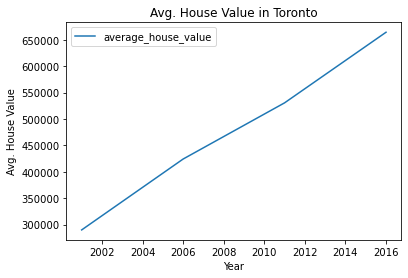

In [16]:
# Plot the average house value per year as a line chart
average_house_value.plot.line(title="Avg. House Value in Toronto", xlabel = "Year", ylabel = "Avg. House Value")

- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [17]:
# Create a new DataFrame with the mean house values by neighbourhood per year
average_house_value_neighbourhood = to_data[['year','neighbourhood','average_house_value']]
average_house_value_neighbourhood.head()

year                 neighbourhood  average_house_value
0  2001               Agincourt North               200388
1  2001  Agincourt South-Malvern West               203047
2  2001                     Alderwood               259998
3  2001                         Annex               453850
4  2001             Banbury-Don Mills               371864

In [18]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
average_house_value_neighbourhood.hvplot(x="year", y="average_house_value", groupby= "neighbourhood", yformatter='%.2f')

:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

In [19]:
# Fetch the data of all dwelling types per year
dwelling_types = to_data.groupby(['year', 'neighbourhood']).mean()
dwelling_types.drop(to_data.columns[-3:], axis=1, inplace= True)
dwelling_types

single_detached_house  \
year neighbourhood                                         
2001 Agincourt North                              3715.0   
     Agincourt South-Malvern West                 3250.0   
     Alderwood                                    3175.0   
     Annex                                        1060.0   
     Banbury-Don Mills                            3615.0   
...                                                  ...   
2016 Wychwood                                      920.0   
     Yonge-Eglinton                               1400.0   
     Yonge-St.Clair                                520.0   
     York University Heights                      1235.0   
     Yorkdale-Glen Park                           2165.0   

                                   apartment_five_storeys_plus  \
year neighbourhood                                               
2001 Agincourt North                                    1480.0   
     Agincourt South-Malvern West                       1835.0   
     Alderwood                                           315.0   
     Annex                                              6090.0   
     Banbury-Don Mills                                  4465.0   
...                                                        ...   
2016 Wychwood                                           1295.0   
     Yonge-Eglinton                                     1995.0   
     Yonge-St.Clair                                     4315.0   
     York University Heights                            5505.0   
     Yorkdale-Glen Park                                 1185.0   

                                   movable_dwelling  semi_detached_house  \
year neighbourhood                                                         
2001 Agincourt North                            0.0               1055.0   
     Agincourt South-Malvern West               0.0                545.0   
     Alderwood                                  0.0                470.0   
     Annex                                      5.0               1980.0   
     Banbury-Don Mills                          0.0                240.0   
...                                             ...                  ...   
2016 Wychwood                                   0.0                880.0   
     Yonge-Eglinton                             0.0                465.0   
     Yonge-St.Clair                             0.0                450.0   
     York University Heights                    0.0               1360.0   
     Yorkdale-Glen Park                         0.0                 80.0   

                                   row_house  duplex  \
year neighbourhood                                     
2001 Agincourt North                  1295.0   195.0   
     Agincourt South-Malvern West      455.0   105.0   
     Alderwood                          50.0   185.0   
     Annex                             605.0   275.0   
     Banbury-Don Mills                 380.0    15.0   
...                                      ...     ...   
2016 Wychwood                          290.0   395.0   
     Yonge-Eglinton                     60.0   310.0   
     Yonge-St.Clair                    220.0   130.0   
     York University Heights           775.0   280.0   
     Yorkdale-Glen Park                600.0   465.0   

                                   apartment_five_storeys_less  other_house  
year neighbourhood                                                           
2001 Agincourt North                                     185.0          5.0  
     Agincourt South-Malvern West                        425.0          0.0  
     Alderwood                                           370.0          0.0  
     Annex                                              3710.0        165.0  
     Banbury-Don Mills                                  1360.0          0.0  
...                                                        ...          ...  
2016 Wychwood                                        

In [20]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
dwelling_types.hvplot.bar(x='year', groupby='neighbourhood', rot=90, height=400, xlabel='Year', ylabel='Dwelling Type Units')

:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

- - - 

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [21]:
# Getting the data from the top 10 expensive neighbourhoods
avg_neighbourhood_price = to_data.groupby(['neighbourhood']).mean('average_house_value').sort_values('average_house_value', ascending=False)
top_10_exp_neighbourhood = avg_neighbourhood_price.head(10)
top_10_exp_neighbourhood

year  single_detached_house  \
neighbourhood                                                      
Bridle Path-Sunnybrook-York Mills  2008.5                2260.00   
Forest Hill South                  2008.5                1742.50   
Lawrence Park South                2008.5                3472.50   
Rosedale-Moore Park                2008.5                2498.75   
St.Andrew-Windfields               2008.5                3225.00   
Casa Loma                          2008.5                 916.25   
Bedford Park-Nortown               2008.5                4865.00   
Forest Hill North                  2008.5                1488.75   
Kingsway South                     2008.5                2326.25   
Yonge-St.Clair                     2008.5                 565.00   

                                   apartment_five_storeys_plus  \
neighbourhood                                                    
Bridle Path-Sunnybrook-York Mills                       331.25   
Forest Hill South                                      2031.25   
Lawrence Park South                                     773.75   
Rosedale-Moore Park                                    4641.25   
St.Andrew-Windfields                                   1670.00   
Casa Loma                                              2310.00   
Bedford Park-Nortown                                   1981.25   
Forest Hill North                                      3392.50   
Kingsway South                                          576.25   
Yonge-St.Clair                                         3948.75   

                                   movable_dwelling  semi_detached_house  \
neighbourhood                                                              
Bridle Path-Sunnybrook-York Mills              0.00                36.25   
Forest Hill South                              1.25                61.25   
Lawrence Park South                            0.00               126.25   
Rosedale-Moore Park                            0.00               486.25   
St.Andrew-Windfields                           0.00               185.00   
Casa Loma                                      0.00               288.75   
Bedford Park-Nortown                           0.00                43.75   
Forest Hill North                              0.00                12.50   
Kingsway South                                 0.00                66.25   
Yonge-St.Clair                                 0.00               425.00   

                                   row_house  duplex  \
neighbourhood                                          
Bridle Path-Sunnybrook-York Mills      90.00    25.0   
Forest Hill South                      45.00    75.0   
Lawrence Park South                    38.75   225.0   
Rosedale-Moore Park                   245.00   327.5   
St.Andrew-Windfields                  552.50    97.5   
Casa Loma                             201.25   162.5   
Bedford Park-Nortown                   57.50   287.5   
Forest Hill North                      16.25    82.5   
Kingsway South                         48.75    20.0   
Yonge-St.Clair                        212.50   172.5   

                                   apartment_five_storeys_less  other_house  \
neighbourhood                                                                 
Bridle Path-Sunnybrook-York Mills                        40.00         0.00   
Forest Hill South                                      1027.50         3.75   
Lawrence Park South                                     966.25        16.25   
Rosedale-Moore Park                                    1618.75         2.50   
St.Andrew-Windfields                                    586.25         5.00   
Casa Loma                                              1192.50         2.50   
Bedford Park-Nortown                                   1275.00        88.75   
Forest Hill North                                       402.50         1.25   
Kingsway South                                     

In [22]:
# Plotting the data from the top 10 expensive neighbourhoods
top_10_exp_neighbourhood.hvplot.bar(rot = 90, height = 500,
                                    title = "Top 10 Expensive Neighbourhoods in Toronto", 
                                    x = "neighbourhood", xlabel = "Neighbourhood", 
                                    y = "average_house_value", ylabel = "Avg. House Value", yformatter='%.2f')

:Bars   [neighbourhood]   (average_house_value)

- - - 

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [23]:
# Load neighbourhoods coordinates data
file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)
df_neighbourhood_locations.head()

neighbourhood        lat        lon
0               Agincourt North  43.805441 -79.266712
1  Agincourt South-Malvern West  43.788658 -79.265612
2                     Alderwood  43.604937 -79.541611
3                         Annex  43.671585 -79.404001
4             Banbury-Don Mills  43.737657 -79.349718

### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [24]:
# Calculate the mean values for each neighborhood
avg_neighbourhood_price = to_data.groupby('neighbourhood').mean('average_house_value').sort_values('average_house_value').reset_index()
avg_neighbourhood_price

neighbourhood    year  single_detached_house  \
0                      Flemingdon Park  2008.5                   5.00   
1                        Taylor-Massey  2008.5                 622.50   
2    Mount Olive-Silverstone-Jamestown  2008.5                1730.00   
3                     Thorncliffe Park  2008.5                   3.75   
4                              Malvern  2008.5                3693.75   
..                                 ...     ...                    ...   
135               St.Andrew-Windfields  2008.5                3225.00   
136                Rosedale-Moore Park  2008.5                2498.75   
137                Lawrence Park South  2008.5                3472.50   
138                  Forest Hill South  2008.5                1742.50   
139  Bridle Path-Sunnybrook-York Mills  2008.5                2260.00   

     apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
0                        6368.75              0.00               182.50   
1                        4795.00              0.00               203.75   
2                        5916.25              1.25               176.25   
3                        6318.75              0.00                 0.00   
4                        2982.50              0.00              1317.50   
..                           ...               ...                  ...   
135                      1670.00              0.00               185.00   
136                      4641.25              0.00               486.25   
137                       773.75              0.00               126.25   
138                      2031.25              1.25                61.25   
139                       331.25              0.00                36.25   

     row_house  duplex  apartment_five_storeys_less  other_house  \
0       630.00    3.75                       591.25         0.00   
1       216.25  150.00                       218.75        15.00   
2      1033.75  603.75                       127.50         1.25   
3       141.25    0.00                       187.50         5.00   
4      3410.00  878.75                       552.50        55.00   
..         ...     ...                          ...          ...   
135     552.50   97.50                       586.25         5.00   
136     245.00  327.50                      1618.75         2.50   
137      38.75  225.00                       966.25        16.25   
138      45.00   75.00                      1027.50         3.75   
139      90.00   25.00                        40.00         0.00   

     average_house_value  shelter_costs_owned  shelter_costs_rented  
0              207799.00              1199.75                973.00  
1              239414.00              1129.25                919.25  
2              253182.25              1159.50                955.25  
3              255264.75              1304.25               1088.50  
4              256880.25              1228.00                998.75  
..                   ...                  ...                   ...  
135            999107.00              1880.25               1384.50  
136           1093640.00              1909.75               1537.25  
137           1094027.75              1954.00               1372.75  
138           1195992.50              1781.00               1313.75  
139           1526485.75              2360.75               2321.75  

[140 rows x 13 columns]

In [25]:
# Join the average values with the neighbourhood locations
avgValues_bylocation = avg_neighbourhood_price.merge(df_neighbourhood_locations, how="outer")
avgValues_bylocation.head()

neighbourhood    year  single_detached_house  \
0                    Flemingdon Park  2008.5                   5.00   
1                      Taylor-Massey  2008.5                 622.50   
2  Mount Olive-Silverstone-Jamestown  2008.5                1730.00   
3                   Thorncliffe Park  2008.5                   3.75   
4                            Malvern  2008.5                3693.75   

   apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
0                      6368.75              0.00               182.50   
1                      4795.00              0.00               203.75   
2                      5916.25              1.25               176.25   
3                      6318.75              0.00                 0.00   
4                      2982.50              0.00              1317.50   

   row_house  duplex  apartment_five_storeys_less  other_house  \
0     630.00    3.75                       591.25         0.00   
1     216.25  150.00                       218.75        15.00   
2    1033.75  603.75                       127.50         1.25   
3     141.25    0.00                       187.50         5.00   
4    3410.00  878.75                       552.50        55.00   

   average_house_value  shelter_costs_owned  shelter_costs_rented        lat  \
0            207799.00              1199.75                973.00  43.715930   
1            239414.00              1129.25                919.25  43.694998   
2            253182.25              1159.50                955.25  43.746868   
3            255264.75              1304.25               1088.50  43.707749   
4            256880.25              1228.00                998.75  43.803658   

         lon  
0 -79.332646  
1 -79.295901  
2 -79.587259  
3 -79.349984  
4 -79.222517

### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

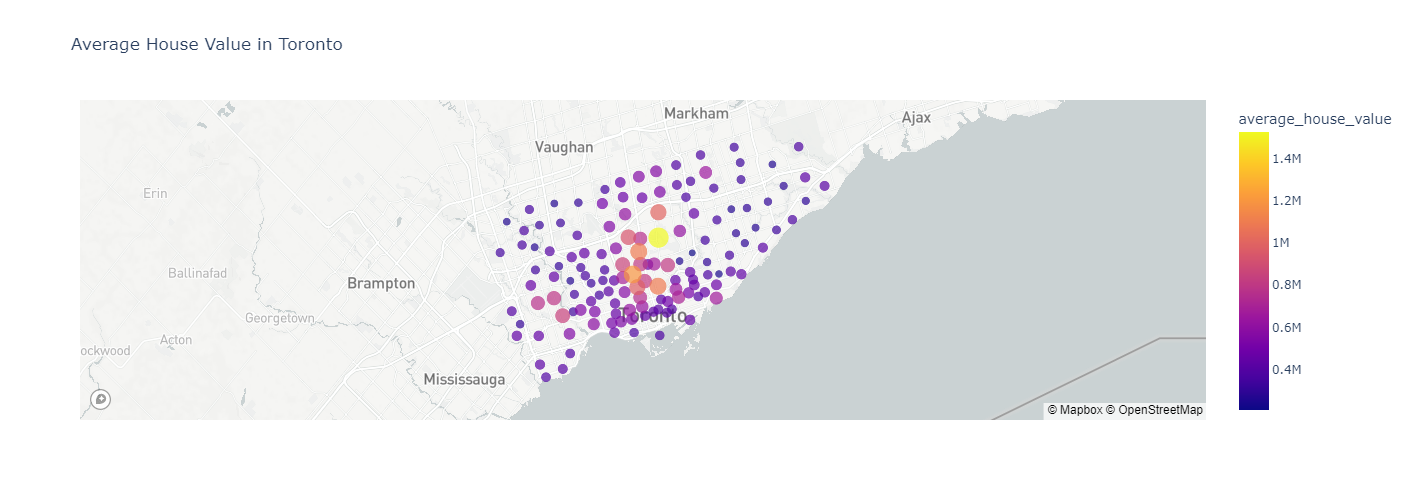

In [30]:
# Create a scatter mapbox to analyze neighbourhood info
fig = px.scatter_mapbox(
    avgValues_bylocation,
    lat="lat",
    lon="lon",
    hover_name="neighbourhood",
    height=500,
    size="average_house_value",
    color="average_house_value",
    title="Average House Value in Toronto",
    zoom=9,
    size_max=15
)

fig.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to a couple of plots that investors can interactively filter and explore various factors related to the house value of the Toronto's neighbourhoods. 

### Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year

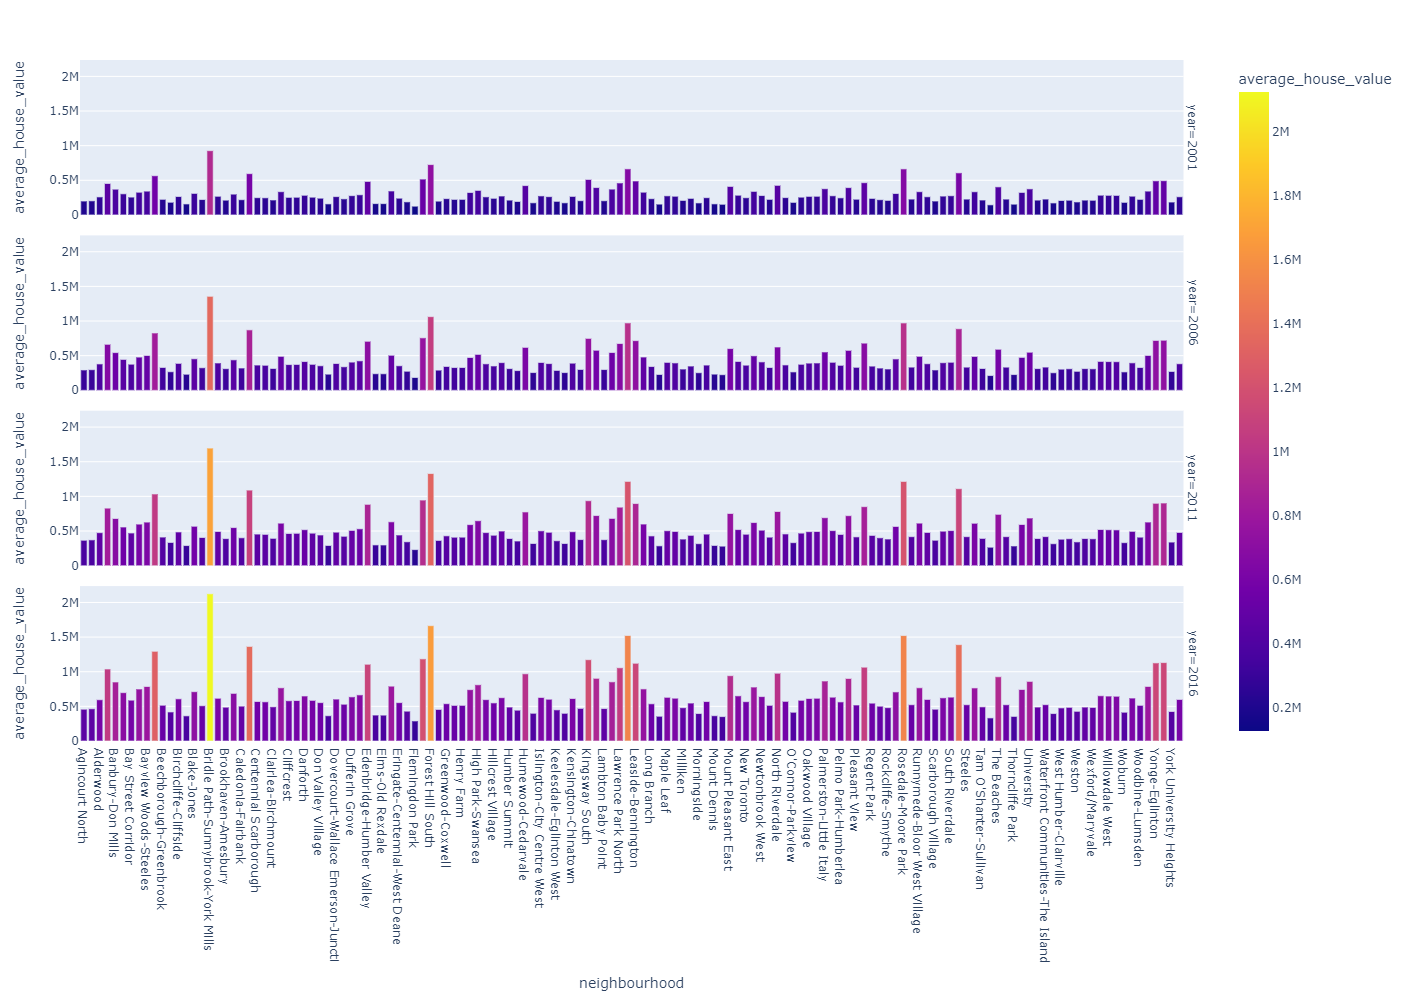

In [31]:
import plotly.express as px
df_reset = to_data.reset_index()


fig = px.bar(df_reset, x="neighbourhood", y="average_house_value", color="average_house_value", facet_row = "year", height = 1000)
fig.show()

### Create a sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year

In [28]:
# Fetch the data from all expensive neighbourhoods per year.
top_10_exp_neighbourhood

year  single_detached_house  \
neighbourhood                                                      
Bridle Path-Sunnybrook-York Mills  2008.5                2260.00   
Forest Hill South                  2008.5                1742.50   
Lawrence Park South                2008.5                3472.50   
Rosedale-Moore Park                2008.5                2498.75   
St.Andrew-Windfields               2008.5                3225.00   
Casa Loma                          2008.5                 916.25   
Bedford Park-Nortown               2008.5                4865.00   
Forest Hill North                  2008.5                1488.75   
Kingsway South                     2008.5                2326.25   
Yonge-St.Clair                     2008.5                 565.00   

                                   apartment_five_storeys_plus  \
neighbourhood                                                    
Bridle Path-Sunnybrook-York Mills                       331.25   
Forest Hill South                                      2031.25   
Lawrence Park South                                     773.75   
Rosedale-Moore Park                                    4641.25   
St.Andrew-Windfields                                   1670.00   
Casa Loma                                              2310.00   
Bedford Park-Nortown                                   1981.25   
Forest Hill North                                      3392.50   
Kingsway South                                          576.25   
Yonge-St.Clair                                         3948.75   

                                   movable_dwelling  semi_detached_house  \
neighbourhood                                                              
Bridle Path-Sunnybrook-York Mills              0.00                36.25   
Forest Hill South                              1.25                61.25   
Lawrence Park South                            0.00               126.25   
Rosedale-Moore Park                            0.00               486.25   
St.Andrew-Windfields                           0.00               185.00   
Casa Loma                                      0.00               288.75   
Bedford Park-Nortown                           0.00                43.75   
Forest Hill North                              0.00                12.50   
Kingsway South                                 0.00                66.25   
Yonge-St.Clair                                 0.00               425.00   

                                   row_house  duplex  \
neighbourhood                                          
Bridle Path-Sunnybrook-York Mills      90.00    25.0   
Forest Hill South                      45.00    75.0   
Lawrence Park South                    38.75   225.0   
Rosedale-Moore Park                   245.00   327.5   
St.Andrew-Windfields                  552.50    97.5   
Casa Loma                             201.25   162.5   
Bedford Park-Nortown                   57.50   287.5   
Forest Hill North                      16.25    82.5   
Kingsway South                         48.75    20.0   
Yonge-St.Clair                        212.50   172.5   

                                   apartment_five_storeys_less  other_house  \
neighbourhood                                                                 
Bridle Path-Sunnybrook-York Mills                        40.00         0.00   
Forest Hill South                                      1027.50         3.75   
Lawrence Park South                                     966.25        16.25   
Rosedale-Moore Park                                    1618.75         2.50   
St.Andrew-Windfields                                    586.25         5.00   
Casa Loma                                              1192.50         2.50   
Bedford Park-Nortown                                   1275.00        88.75   
Forest Hill North                                       402.50         1.25   
Kingsway South                                     

In [29]:
# Create the sunburst chart
import plotly.express as px
import numpy as np
top_10_exp_neighbourhood = px.data.gapminder()
fig = px.sunburst(top_10_exp_neighbourhood, path=['year', 'neighbourhood'], values='pop',
                  color='average_house_value', hover_data=['iso_alpha'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(top_10_exp_neighbourhood['average_house_value'], weights=df['pop']))
fig.show()

KeyError: 'average_house_value'